In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [20]:

data = pd.read_csv('Housing.csv')
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [21]:
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ]] = data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ]].map(lambda x : 1 if x.lower()=='yes' else 0)

data['furnishingstatus'] = data['furnishingstatus'].map(lambda x: 2 if x.lower() == 'furnished' 
                                                    else 1 if x.lower() == 'semi-furnished' 
                                                    else 0)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [22]:
max_price = data['price'].max()
min_price = data['price'].min()
data_normalized = data.copy()
def min_max_normalize(data) :
    # return (data-data.min()/ (data.max()-data.min()))
    for cols in data.columns :
        data[cols] = (data[cols] - data[cols].min())/ (data[cols].max()- data[cols].min())


min_max_normalize(data_normalized)
print(data_normalized)


        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1    0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2    0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3    0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4    0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   
..        ...       ...       ...        ...       ...       ...        ...   
540  0.006061  0.092784       0.2   0.000000  0.000000       1.0        0.0   
541  0.001485  0.051546       0.4   0.000000  0.000000       0.0        0.0   
542  0.000000  0.135395       0.2   0.000000  0.000000       1.0        0.0   
543  0.000000  0.086598       0.4   0.000000  0.000000       0.0        0.0   
544  0.000000  0.151203       0.4   0.000000  0.333333       1.0        0.0   

     basement  hotwaterheating  airconditioning   p

In [23]:
# splitting dataset

m , n = data.shape
data_shuffle = data_normalized.sample(frac = 1)
kagiri = int(0.8 * m)
data_train = data_shuffle[:kagiri]
data_test = data_shuffle[kagiri:]

# MAE dan MSE

def MSE(y_predict, y) :
    n = y.shape[0]
    return 1/n * (y_predict-y)**2

print(data_train.shape)
print(data_test.shape)

# forward pass
# backward pass
# semi-batch, stochastic, batch gd


(436, 13)
(109, 13)


In [24]:
# Initialize parameters
def init_params(n_neuron_hidden):
    W1 = np.random.randn(n_neuron_hidden, 12)
    b1 = np.random.randn(n_neuron_hidden, 1)
    W2 = np.random.randn(1, n_neuron_hidden)
    b2 = np.random.randn(1, 1)
    return W1, b1, W2, b2

# Leaky ReLU activation function
def ReLU(Z):
    return np.maximum(0, Z)

# Derivative of ReLU
def dReLU(Z):
    return Z>0

# Forward propagation
def forward_prop(W1, b1, W2, b2, X) :
    X = X.T
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Z2  # Linear activation for regression
    # print("X : ", X.shape)
    # print("W1 : ", W1.shape)
    # print("b1 : ", b1.shape)
    # print("A1 : ", A1.shape)
    # print("W2 : ", W2.shape)
    # print("b2 : ", b2.shape)
    # print("A2 : ", A2.shape)
    return Z1, A1, Z2, A2

# MSE Loss function
def mse_loss(Y, A2):
    m = Y.shape[0]
    loss = np.mean((A2 - Y) ** 2) 
    return loss
def mae_loss(Y, A2) :
    m = Y.shape[1]
    loss = np.mean(abs(A2-Y))
    return loss

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[0]
    Y = Y.reshape(1, -1)  # Reshape Y to (1, m)
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Implementing different gradient descent strategies

def gradient_descent(X, Y, W1, b1, W2, b2, learning_rate, iterations, batch_type='batch', batch_size=32):
    m = X.shape[0]  # Number of examples
    history = []
    for i in range(iterations):
        if batch_type == 'batch':  # Batch Gradient Descent
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            loss = mse_loss(Y, A2.T)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        elif batch_type == 'mini-batch':  # Mini-batch Gradient Descent
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            for k in range(0, m, batch_size):
                X_mini = X_shuffled[k:k+batch_size]
                Y_mini = Y_shuffled[k:k+batch_size]
                Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_mini)
                loss = mse_loss(Y_mini, A2.T)
                dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_mini, Y_mini)
                W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        elif batch_type == 'sgd':  # Stochastic Gradient Descent (SGD)
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            for k in range(m):
                X_single = X_shuffled[k:k+1]
                Y_single = Y_shuffled[k:k+1]
                Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_single)
                loss = mse_loss(Y_single, A2.T)
                dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_single, Y_single)
                W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        history.append(loss)
        if i % 10 == 0:
            print(f"Iteration {i} - Loss: {loss}")
    return W1, b1, W2, b2, history

def predict(W1, b1, W2, b2, X):
    # Perform forward propagation with trained weights and biases
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Z2  # Linear activation for regression output
    return A2



In [25]:
X_tr = data_train.drop(columns=['price']).values # Input data with 100 examples and 12 features
Y_tr = data_train['price'].values   # Output data (continuous values for regression)


print(X_tr.shape)
print(Y_tr.shape)
print(X_tr)
# Initialize parameters
W1, b1, W2, b2 = init_params(50)

# Train the network with mini-batch gradient descent
# W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=10000, batch_type='mini-batch', batch_size=32)


# W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=10000, batch_type='batch')

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='sgd')



(436, 12)
(436,)
[[0.22749141 0.6        0.         ... 0.         0.         0.5       ]
 [0.22749141 0.2        0.         ... 0.         0.         0.        ]
 [0.12852234 0.4        0.         ... 0.         1.         0.5       ]
 ...
 [0.23298969 0.4        0.         ... 0.         0.         0.        ]
 [0.79381443 0.4        0.         ... 0.66666667 1.         1.        ]
 [0.15120275 0.4        0.         ... 0.         0.         0.        ]]
Iteration 0 - Loss: 5.783789704365151
Iteration 10 - Loss: 0.43292153602402916
Iteration 20 - Loss: 0.11674961676078113
Iteration 30 - Loss: 0.05622597477830013
Iteration 40 - Loss: 0.04252490924302734
Iteration 50 - Loss: 0.0036369832906860775
Iteration 60 - Loss: 0.004704457264729674
Iteration 70 - Loss: 0.024500236011123798
Iteration 80 - Loss: 0.04329723728790238
Iteration 90 - Loss: 0.14387780127257993
Iteration 100 - Loss: 0.008360875677294911
Iteration 110 - Loss: 0.8556915189564626
Iteration 120 - Loss: 0.12568963372042433
It

In [26]:
X_test = data_test.drop(columns=['price']).values
Y_test = data_test['price'].values

print(X_test[1])
harga = predict(W1, b1, W2, b2, X_test[1].reshape(-1, 1))
print(harga.shape)
print(harga)
print(Y_test[1])

[0.32371134 0.2        0.         0.         1.         0.
 0.         0.         0.         0.         0.         1.        ]
(1, 1)
[[0.13185719]]
0.21818181818181817


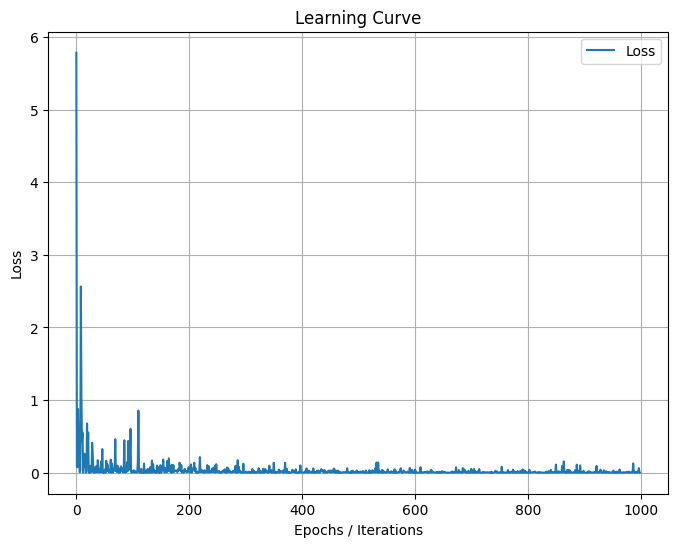

In [27]:


# Assuming loss_history is your array with loss values over epochs/iterations
# For example: loss_history = [0.5, 0.4, 0.35, 0.3, ...]

def plot_learning_curve(loss_history):
    plt.figure(figsize=(8, 6))
    
    # Plot loss vs. iterations/epochs
    plt.plot(loss_history, label='Loss')
    
    # Adding labels and title
    plt.xlabel('Epochs / Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    
    # Optional: Add a grid and legend for better visualization
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

# Assuming loss_history is already populated
plot_learning_curve(loss_history)
